In [107]:
# import libs
import requests
import json
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt


# define paths
API_key_path = "API keys/salling_bearer.txt"


In [108]:
# get credentials
def get_file_contents(filename):
    try:
        with open(filename, 'r') as f:
            # It's assumed our file contains a single line,
            # with our API key
            return f.read().strip()
    except FileNotFoundError:
        print("'%s' file not found" % filename)

API_key = get_file_contents(API_key_path)

In [109]:
# define zip codes
zipcodedf = pd.read_csv("data/zipcodes.csv")

In [110]:
zipcodedf.head()

,Postal Code,City
0,555,Scanning
1,800,Høje Taastrup
2,877,Valby
3,899,Kommuneservice
4,900,København C


In [111]:
uniqueZipCodes = zipcodedf['Postal Code'].unique()

for i, zipcode in enumerate(uniqueZipCodes):
    endpoint_url = f"https://api.sallinggroup.com/v1/food-waste?zip={zipcode}"

    # Set your API key or access token as a header
    headers = {"Authorization": f"Bearer {API_key}"}
    # Make the HTTP GET request to the API endpoint
    response = requests.get(endpoint_url, headers=headers)
    
    if response.status_code == 200:
        # Parse the response content as JSON
        data = response.json()
        print(response.status_code)
        # Extract the relevant data from the JSON object
        # and do something with it (e.g. print it out)
        print('Data Retrieval has been compeleted')
    else:
        print("Error: Failed to retrieve data from API")
    
    data = response.json()
    # create data frame structre
    if i == 0:
        df = pd.json_normalize(data, record_path=['clearances'], meta=['store', ['store', 'brand'], ['store', 'name'], ['store', 'id']])
    # iteratively join data frames for different zip codes
    else:
        try:
            df = pd.concat([df, pd.json_normalize(data, record_path=['clearances'], meta=['store', ['store', 'brand'], ['store', 'name'], ['store', 'id']])])
        except:
            pass
    
    time.sleep(2)

# expand store related information
df = df.join(pd.json_normalize(df['store']))


200
Data Retrieval has been compeleted
200
Data Retrieval has been compeleted
200
Data Retrieval has been compeleted
200
Data Retrieval has been compeleted
200
Data Retrieval has been compeleted
200
Data Retrieval has been compeleted
200
Data Retrieval has been compeleted
200
Data Retrieval has been compeleted
200
Data Retrieval has been compeleted
200
Data Retrieval has been compeleted
200
Data Retrieval has been compeleted
200
Data Retrieval has been compeleted
200
Data Retrieval has been compeleted
200
Data Retrieval has been compeleted
200
Data Retrieval has been compeleted
200
Data Retrieval has been compeleted
200
Data Retrieval has been compeleted
200
Data Retrieval has been compeleted
200
Data Retrieval has been compeleted
200
Data Retrieval has been compeleted
200
Data Retrieval has been compeleted
200
Data Retrieval has been compeleted
200
Data Retrieval has been compeleted
200
Data Retrieval has been compeleted
200
Data Retrieval has been compeleted
200
Data Retrieval has be

In [112]:
# print first 5 rows
df.head()

,offer.currency,offer.discount,offer.ean,offer.endTime,offer.lastUpdate,offer.newPrice,offer.originalPrice,offer.percentDiscount,offer.startTime,offer.stock,...,coordinates,hours,name,id,type,address.city,address.country,address.extra,address.street,address.zip
0,DKK,16.95,5712580187402,2023-03-28T21:59:59.000Z,2023-03-23T14:04:26.000Z,25.00,41.95,40.41,2023-03-22T13:44:23.000Z,3.0,...,"[12.58234, 55.680168]","[{'date': '2023-03-24', 'type': 'store', 'open...",føtex Food K. Bernikows G.,2b2a046f-1454-4db5-89db-251f63775a9e,Point,København K,DK,None,Kristen Bernikows Gade 2,1105
0,DKK,10.98,200908,2023-03-25T22:59:59.000Z,2023-03-24T07:43:08.000Z,38.92,49.90,22.00,2023-03-24T07:42:36.000Z,1.0,...,"[12.58234, 55.680168]","[{'date': '2023-03-24', 'type': 'store', 'open...",føtex Food K. Bernikows G.,2b2a046f-1454-4db5-89db-251f63775a9e,Point,København K,DK,None,Kristen Bernikows Gade 2,1105
0,DKK,25.00,5712580680804,2023-04-30T21:59:59.000Z,2023-03-23T16:06:37.000Z,74.00,99.00,25.25,2023-03-17T07:48:43.000Z,1.0,...,"[12.58234, 55.680168]","[{'date': '2023-03-24', 'type': 'store', 'open...",føtex Food K. Bernikows G.,2b2a046f-1454-4db5-89db-251f63775a9e,Point,København K,DK,None,Kristen Bernikows Gade 2,1105
0,DKK,11.95,5712580211992,2023-03-28T21:59:59.000Z,2023-03-23T13:32:43.000Z,25.00,36.95,32.34,2023-03-21T14:01:04.000Z,5.0,...,"[12.58234, 55.680168]","[{'date': '2023-03-24', 'type': 'store', 'open...",føtex Food K. Bernikows G.,2b2a046f-1454-4db5-89db-251f63775a9e,Point,København K,DK,None,Kristen Bernikows Gade 2,1105
0,DKK,7.00,5712580338798,2023-03-28T21:59:59.000Z,2023-03-23T13:36:15.000Z,20.00,27.00,25.93,2023-03-23T08:29:47.000Z,4.0,...,"[12.58234, 55.680168]","[{'date': '2023-03-24', 'type': 'store', 'open...",føtex Food K. Bernikows G.,2b2a046f-1454-4db5-89db-251f63775a9e,Point,København K,DK,None,Kristen Bernikows Gade 2,1105


In [113]:
df.describe()

,offer.discount,offer.newPrice,offer.originalPrice,offer.percentDiscount,offer.stock
count,13491.000000,13491.000000,13491.000000,13491.000000,13491.000000
mean,11.065278,17.790762,28.856040,38.435506,30.877792
std,9.036391,14.084241,20.515952,14.239817,238.857614
min,0.250000,1.000000,1.250000,0.630000,1.000000
25%,5.500000,10.000000,17.950000,25.580000,1.000000
50%,8.950000,14.000000,23.750000,36.840000,3.000000
75%,13.950000,22.000000,34.950000,47.490000,7.000000
max,199.000000,449.000000,499.000000,93.990000,9999.000000


In [114]:
# there are 2700 ish rows with nan as product category
# we will filter these out
df = df.dropna(subset='product.categories.en')

# clean product categories
df['product.categories.en'] = df['product.categories.en'].str.replace('>sification 1 root>umer Faced Hierarchy','')
new = df["product.categories.en"].str.split(">", n = 6, expand = True)

for i in np.arange(0,6,1):
    df[f'product.category.en.level{i}'] = new[i]

In [115]:
# add year, month, weekday and hour for each timestamp
df['offer.endTime']  = pd.to_datetime(df['offer.endTime']).dt.tz_convert('Europe/Berlin')
df['offer.startTime'] = pd.to_datetime(df['offer.startTime']).dt.tz_convert('Europe/Berlin')
df['offer.lastUpdate'] = pd.to_datetime(df['offer.lastUpdate']).dt.tz_convert('Europe/Berlin')

df['offer.endTime.hour'] = df['offer.endTime'].dt.hour
df['offer.endTime.weekday'] = df['offer.endTime'].dt.weekday
df['offer.endTime.month'] = df['offer.endTime'].dt.month
df['offer.endTime.year'] = df['offer.endTime'].dt.year

df['offer.startTime.hour'] = df['offer.startTime'].dt.hour
df['offer.startTime.weekday'] = df['offer.startTime'].dt.weekday
df['offer.startTime.month'] = df['offer.startTime'].dt.month
df['offer.startTime.year'] = df['offer.startTime'].dt.year

df['offer.lastUpdate.hour'] = df['offer.lastUpdate'].dt.hour
df['offer.lastUpdate.weekday'] = df['offer.lastUpdate'].dt.weekday
df['offer.lastUpdate.month'] = df['offer.lastUpdate'].dt.month
df['offer.lastUpdate.year'] = df['offer.lastUpdate'].dt.year


In [116]:
# save data
#df.to_csv('data/data.csv')

# load data
#df = pd.read_csv('data/data.csv')

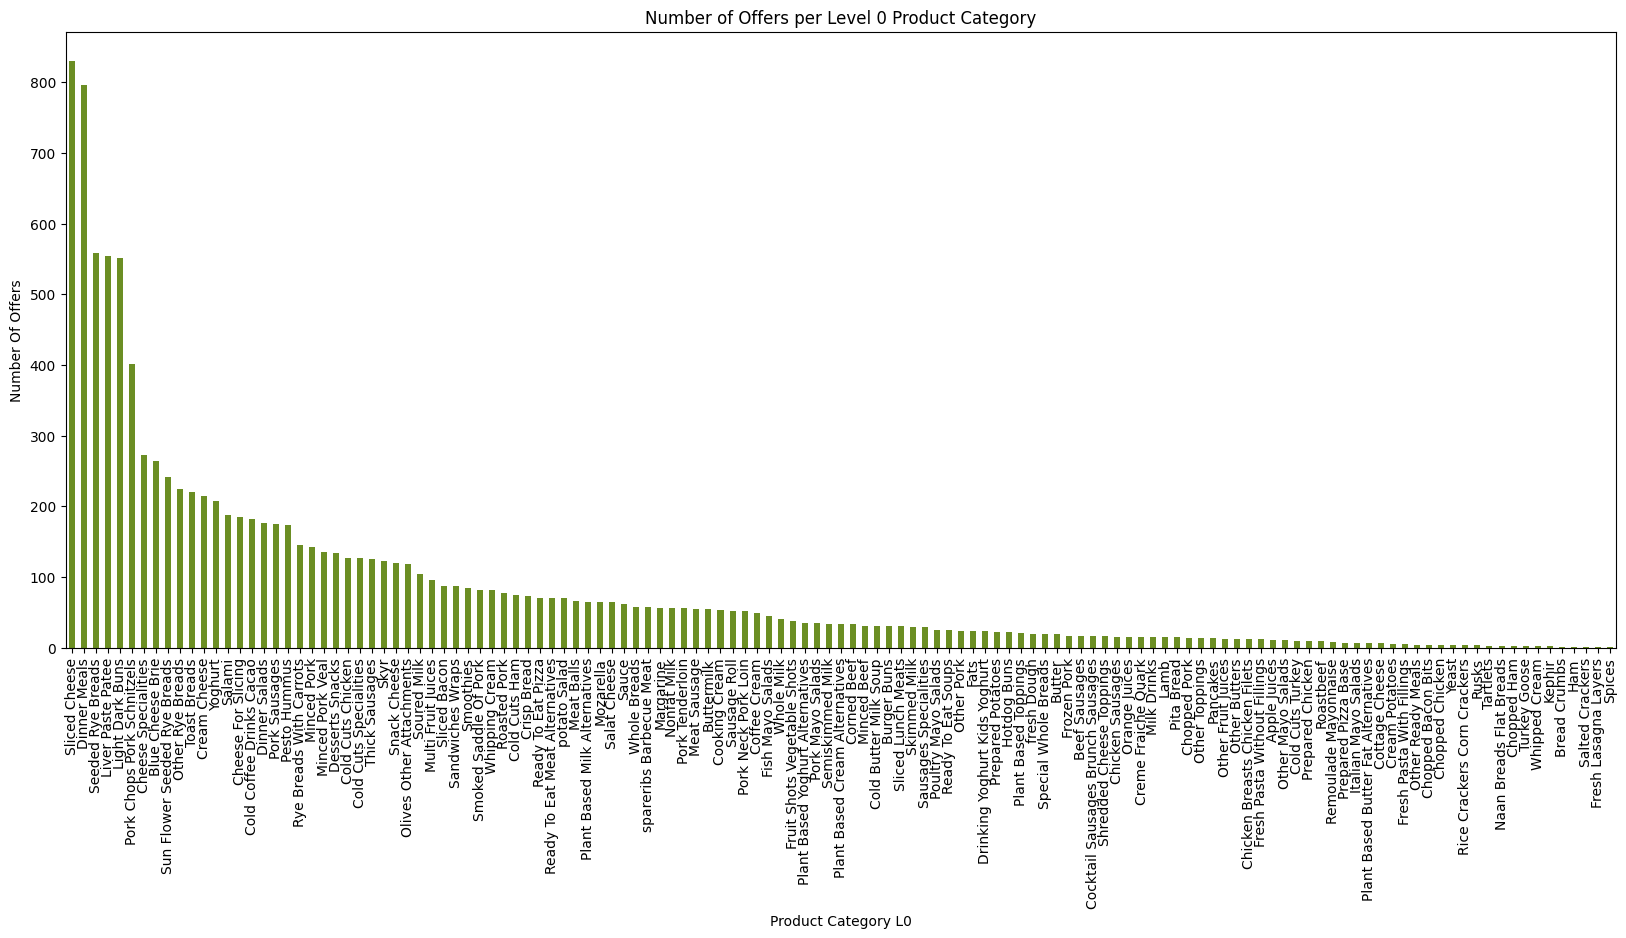

In [117]:
# visualise data
# start offer

df_offersPerCategoryL0 = df[['offer.startTime','product.category.en.level0']].groupby('product.category.en.level0').count()
df_offersPerCategoryL0 = df_offersPerCategoryL0.rename(columns = {'offer.startTime': 'NumberOfOffers'})
df_offersPerCategoryL0 = df_offersPerCategoryL0.sort_values('NumberOfOffers', ascending=False)
# create plot
df_offersPerCategoryL0.plot.bar(figsize=(20,8), legend=False,ylabel='Number Of Offers', xlabel='Product Category L0', title='Number of Offers per Level 0 Product Category',color='olivedrab')
plt.show()

#offer_category_weekday = pd.pivot_table(df, values='offer.ean', index='offer.startTime.weekday',columns='product.category.en.level0',aggfunc='count')
#offer_category_weekday

In [118]:
# implement NLP to generate better classifications/categories for the products
from sklearn.feature_extraction import _stop_words
import string
from nltk.stem import WordNetLemmatizer
from sentence_transformers import SentenceTransformer
from adjustText import adjust_text
from sklearn.decomposition import PCA


lemmatizer = WordNetLemmatizer()

# pre process words
def text_processing(text):
    # remove punctuation 
    text = "".join([c for c in text 
                    if c not in string.punctuation])
    # lowercase
    text = "".join([c.lower() for c in text])
    # remove stopwords
    text = " ".join([w for w in text.split() 
                     if w not in _stop_words.ENGLISH_STOP_WORDS])
    # stemming / lematizing (optional)
    text = " ".join([lemmatizer.lemmatize(w) for w in text.split()])
    return text

# define unique level 0 categories
L0categories = df['product.category.en.level0'].unique()
# remove 'nan'
#L0categories = [x for x in L0categories if str(x) != 'nan']

cleanL0categories = np.empty(np.shape(L0categories)[0],dtype=str)
for i, text in enumerate(L0categories):
    cleanL0categories[i] = (text_processing(text))

# We need to embed sentences into vectors 
# define unique level 0 categories
# define model
model = SentenceTransformer('all-MiniLM-L6-v2') #https://www.sbert.net/
# vectorize each categary
vectorembeddings = model.encode(L0categories)

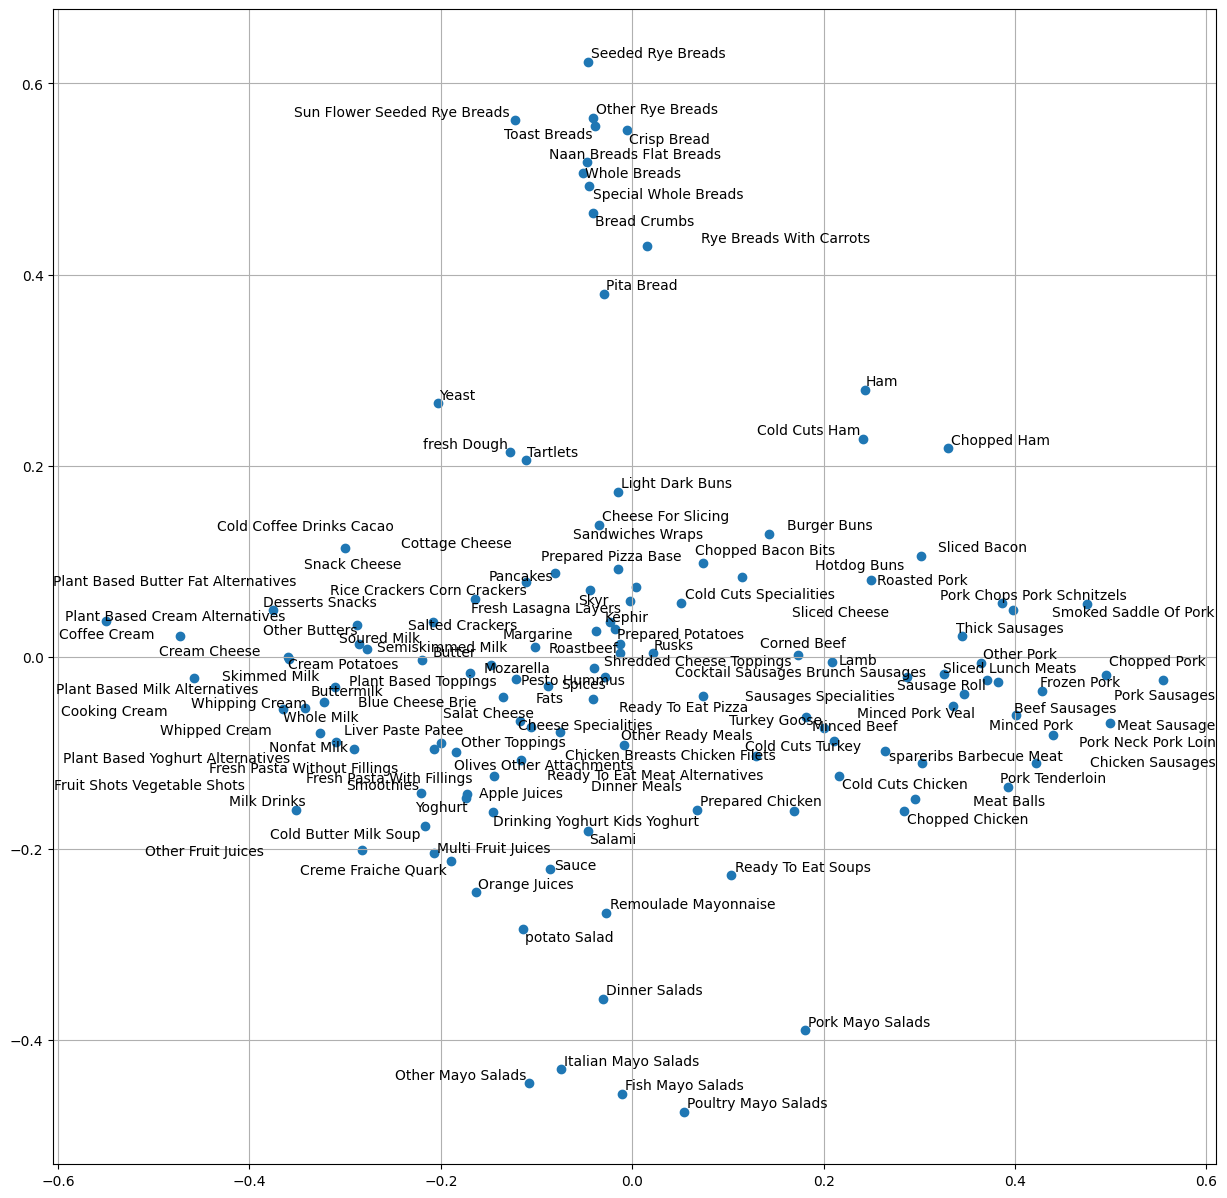

In [119]:
# PCA decomp. Exploratory analysis
# 2D
pca = PCA(n_components=2)
vectors_2d = pca.fit_transform(np.array(vectorembeddings))

plt.figure(figsize=(15,15))
plt.scatter(vectors_2d.T[0], vectors_2d.T[1])

texts = [plt.text(vectors_2d.T[0,i], vectors_2d.T[1,i], L0categories[i]) for i in range(len(L0categories))]
adjust_text(texts, fontsize=5)          
plt.grid()
plt.show()

In [120]:
# kmeans clustering
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4,random_state=0)
kmeans.fit(np.array(vectorembeddings))
labels = kmeans.labels_

clusteringresults = pd.DataFrame({'L0Categories' : L0categories,'Label': labels})

for i in clusteringresults['Label'].unique():
    print(f"Label {i}")
    print(clusteringresults[clusteringresults['Label']==i]['L0Categories'].unique())
    
# use clustering labels to give each product a lable i.e use the above as a mapping
clustermapping = {}

for i, text in enumerate(clusteringresults['L0Categories'].unique()):
    clustermapping[text] = str(clusteringresults['Label'][i])

df['L0Categories.new'] = df['product.category.en.level0'].map(clustermapping)

Label 3
['Beef Sausages' 'Pork Sausages' 'Thick Sausages' 'Pork Neck Pork Loin'
 'Pork Chops Pork Schnitzels' 'Pork Tenderloin' 'Meat Sausage'
 'Cold Cuts Specialities' 'Minced Pork' 'Cold Cuts Ham'
 'Cold Cuts Chicken' 'Roasted Pork' 'Lamb' 'Minced Pork Veal'
 'Sliced Bacon' 'Smoked Saddle Of Pork' 'Ham' 'spareribs Barbecue Meat'
 'Ready To Eat Meat Alternatives' 'Skyr' 'Sausage Roll' 'Meat Balls'
 'Hotdog Buns' 'Corned Beef' 'Other Pork' 'Rusks' 'Minced Beef'
 'Chopped Pork' 'Cold Cuts Turkey' 'Sliced Lunch Meats' 'Turkey Goose'
 'Prepared Chicken' 'Sausages Specialities'
 'Chicken Breasts Chicken Filets' 'Chicken Sausages' 'Frozen Pork'
 'Cocktail Sausages Brunch Sausages' 'Chopped Chicken' 'Roastbeef'
 'Chopped Bacon Bits' 'Chopped Ham']
Label 1
['Blue Cheese Brie' 'Cooking Cream' 'Sliced Cheese' 'Pancakes'
 'Snack Cheese' 'Liver Paste Patee' 'Dinner Meals' 'Whipping Cream'
 'Mozarella' 'Poultry Mayo Salads' 'Cheese For Slicing'
 'Creme Fraiche Quark' 'Cheese Specialities' 'Pesto H

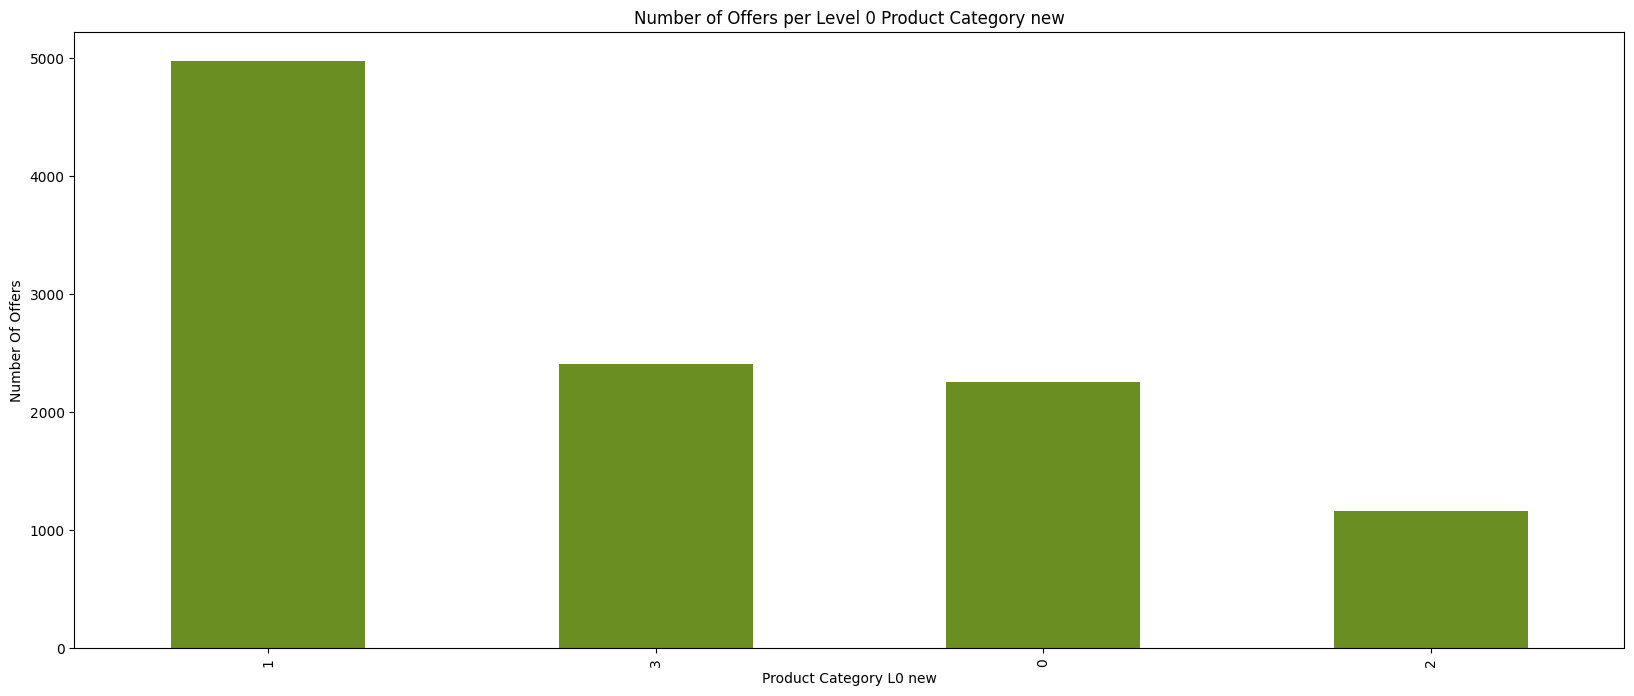

In [121]:
# visualise new categories 
df_offersPerCategoryL0new = df[['offer.startTime','L0Categories.new']].groupby('L0Categories.new').count()
df_offersPerCategoryL0new = df_offersPerCategoryL0new.rename(columns = {'offer.startTime': 'NumberOfOffers'})
df_offersPerCategoryL0new = df_offersPerCategoryL0new.sort_values('NumberOfOffers', ascending=False)
# create plot
df_offersPerCategoryL0new.plot.bar(figsize=(20,8), legend=False,ylabel='Number Of Offers', xlabel='Product Category L0 new', title='Number of Offers per Level 0 Product Category new',color='olivedrab')
plt.show()
